# ユーグレナ 日足

In [1]:
import sys
sys.path.append('..')

import re

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.technical import psar

In [2]:
pattern = re.compile(r'(.+)\.T')

symbol = '2931.T'
ticker = yf.Ticker(symbol)

df = ticker.history(period='1y')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-05 00:00:00+09:00,605.0,613.0,594.0,611.0,710100,0.0,0.0
2024-03-06 00:00:00+09:00,607.0,624.0,606.0,606.0,767100,0.0,0.0
2024-03-07 00:00:00+09:00,610.0,615.0,603.0,604.0,426800,0.0,0.0
2024-03-08 00:00:00+09:00,601.0,611.0,600.0,605.0,575300,0.0,0.0
2024-03-11 00:00:00+09:00,604.0,609.0,597.0,603.0,570500,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-27 00:00:00+09:00,511.0,516.0,501.0,502.0,946700,0.0,0.0
2025-02-28 00:00:00+09:00,502.0,510.0,487.0,487.0,1059600,0.0,0.0
2025-03-03 00:00:00+09:00,494.0,496.0,483.0,489.0,607700,0.0,0.0


## 日足チャートとパラボリック SAR

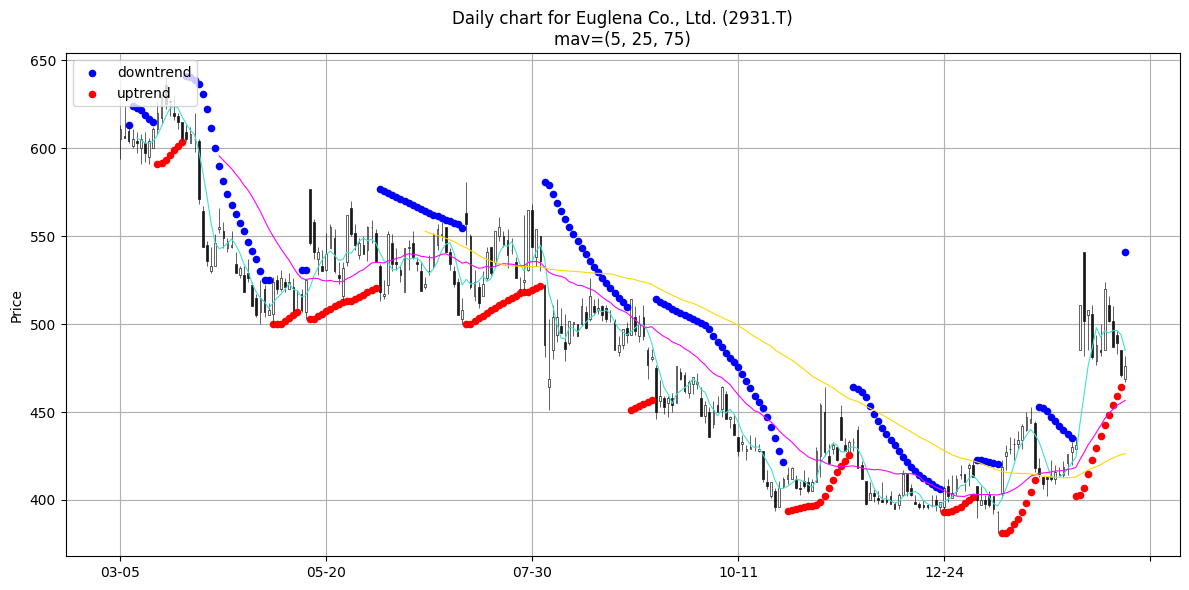

In [3]:
dict_psar = psar(df)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

apds  = [
    mpf.make_addplot(
        dict_psar['bear'],
        type='scatter',
        marker='o',
        markersize=20,
        color='blue',
        label='downtrend',
        ax=ax
    ),
    mpf.make_addplot(
        dict_psar['bull'],
        type='scatter',
        marker='o',
        markersize=20,
        color='red',
        label='uptrend',
        ax=ax
    ),
] 

mpf.plot(
    df,
    type='candle',
    style='default',
    mav=(5, 25, 75),
    volume=False,
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)

try:
    ax.set_title('Daily chart for %s (%s)\nmav=(5, 25, 75)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Daily chart for %s\nmav=(5, 25, 75)' % symbol)

ax.grid()
ax.legend(loc='upper left')

plt.tight_layout()

m = pattern.match(symbol)
if m:
    plt.savefig('daily_chart_%s.png' % m.group(1))
else:
    plt.savefig('daily_chart_%s.png' % symbol)

plt.show()

In [13]:
df.tail(2)['Close']

Date
2025-01-23 00:00:00+09:00    432.0
2025-01-24 00:00:00+09:00    434.0
Name: Close, dtype: float64

In [14]:
df.tail(2)['Close'].diff()

Date
2025-01-23 00:00:00+09:00    NaN
2025-01-24 00:00:00+09:00    2.0
Name: Close, dtype: float64

In [15]:
df['Close'].rolling(5).mean().tail(2)

Date
2025-01-23 00:00:00+09:00    420.0
2025-01-24 00:00:00+09:00    428.2
Name: Close, dtype: float64

In [16]:
df['Close'].rolling(25).mean().tail(2)

Date
2025-01-23 00:00:00+09:00    406.08
2025-01-24 00:00:00+09:00    407.52
Name: Close, dtype: float64

In [8]:
df['Close'].rolling(75).mean().tail(2)

Date
2025-01-23 00:00:00+09:00    415.173333
2025-01-24 00:00:00+09:00    415.146667
Name: Close, dtype: float64